<a href="https://colab.research.google.com/github/shahd1995913/OCR-for-Chemistry/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install rdkit
!conda install -c conda-forge -y python=3 rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 61.6 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found


In [13]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import os

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/Book1.xlsx', engine='openpyxl')

# Assuming your Excel columns are named 'Ketone Reactants' and 'Label'
smiles_column = 'Ketone Reactants'
label_column = 'Label'

# Create a list of compounds as tuples (SMILES, Label)
compounds = [(row[smiles_column], row[label_column]) for _, row in df.iterrows()]

# Create a folder named 'compounds' if it doesn't exist
output_folder = '/content/compounds_final'
os.makedirs(output_folder, exist_ok=True)

# Generate images from SMILES and save them in the folder
for idx, (smiles, label) in enumerate(compounds, start=1):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        img = Draw.MolToImage(mol, size=(300, 300))
        img.save(f'{output_folder}/Ketone Reactants {idx}.png')
    else:
        print(f'Unable to generate an image for compound {idx}')

# Check if the images have been generated
os.listdir(output_folder)


[18:01:17] SMILES Parse Error: syntax error while parsing: S(CC(O=)C)C
[18:01:17] SMILES Parse Error: Failed parsing SMILES 'S(CC(O=)C)C' for input: 'S(CC(O=)C)C'
[18:01:17] SMILES Parse Error: syntax error while parsing: C13H26O
[18:01:17] SMILES Parse Error: Failed parsing SMILES 'C13H26O' for input: 'C13H26O'
[18:01:17] SMILES Parse Error: syntax error while parsing: C14H22O
[18:01:17] SMILES Parse Error: Failed parsing SMILES 'C14H22O' for input: 'C14H22O'


Unable to generate an image for compound 31
Unable to generate an image for compound 35
Unable to generate an image for compound 36


['Ketone Reactants 49.png',
 'Ketone Reactants 17.png',
 'Ketone Reactants 143.png',
 'Ketone Reactants 8.png',
 'Ketone Reactants 69.png',
 'Ketone Reactants 53.png',
 'Ketone Reactants 9.png',
 'Ketone Reactants 1.png',
 'Ketone Reactants 66.png',
 'Ketone Reactants 156.png',
 'Ketone Reactants 130.png',
 'Ketone Reactants 4.png',
 'Ketone Reactants 75.png',
 'Ketone Reactants 43.png',
 'Ketone Reactants 26.png',
 'Ketone Reactants 97.png',
 'Ketone Reactants 54.png',
 'Ketone Reactants 147.png',
 'Ketone Reactants 64.png',
 'Ketone Reactants 82.png',
 'Ketone Reactants 16.png',
 'Ketone Reactants 46.png',
 'Ketone Reactants 6.png',
 'Ketone Reactants 154.png',
 'Ketone Reactants 29.png',
 'Ketone Reactants 12.png',
 'Ketone Reactants 65.png',
 'Ketone Reactants 57.png',
 'Ketone Reactants 139.png',
 'Ketone Reactants 7.png',
 'Ketone Reactants 109.png',
 'Ketone Reactants 114.png',
 'Ketone Reactants 150.png',
 'Ketone Reactants 62.png',
 'Ketone Reactants 125.png',
 'Ketone Reactan

In [40]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

import pytesseract
from PIL import Image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (27.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data Preparation
data_dir = '/content/gdrive/MyDrive/compounds_final'
image_files = os.listdir(data_dir)
X = []  # List to store images
y = []  # List to store labels

for file in image_files:
    # Load and preprocess images
    image = cv2.imread(os.path.join(data_dir, file))
    image = cv2.resize(image, (500, 500))  # Adjust size as needed
    image = image / 255.0  # Normalize pixel values

    X.append(image)

    # Extract labels from file names
    label = file.split("_")[0]  # Assuming labels are before the first underscore
    y.append(label)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(num_classes)
# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model Architecture (a simple CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


155


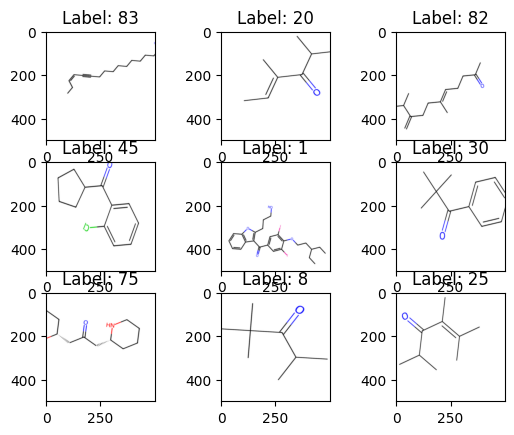

Epoch 1/10


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data Preparation
data_dir = '/content/gdrive/MyDrive/compounds_final'
image_files = os.listdir(data_dir)
X = []  # List to store images
y = []  # List to store labels

for file in image_files:
    # Load and preprocess images
    image = cv2.imread(os.path.join(data_dir, file))
    image = cv2.resize(image, (500, 500))  # Adjust size as needed
    image = image / 255.0  # Normalize pixel values

    X.append(image)

    # Extract labels from file names
    label = file.split("_")[0]  # Assuming labels are before the first underscore
    y.append(label)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(num_classes)

# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Print or visualize augmented data
augmented_images = datagen.flow(X_train, y_train_encoded, batch_size=32)
for i in range(9):  # Print the first 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = augmented_images.next()
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    plt.title(f'Label: {label}')
plt.show()

# Model Architecture (a simple CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=10)

# Testing and Evaluation
accuracy = model.evaluate(X_test, y_test_encoded)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Data Preparation
data_dir = '/content/gdrive/MyDrive/compounds_final'
image_files = os.listdir(data_dir)
X = []  # List to store images
y = []  # List to store labels

for file in image_files:
    # Load and preprocess images
    image = cv2.imread(os.path.join(data_dir, file))
    image = cv2.resize(image, (500, 500))  # Adjust size as needed
    image = image / 255.0  # Normalize pixel values

    # Add a white background to the image
    image_with_white_background = add_white_background(image)

    X.append(image_with_white_background)

    # Extract labels from file names
    label = file.split("_")[0]  # Assuming labels are before the first underscore
    y.append(label)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(num_classes)

# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Model Architecture (a simple CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train_encoded, batch_size=32), epochs=10)

# Testing and Evaluation
accuracy = model.evaluate(X_test, y_test_encoded)


In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Data Preparation
data_dir = '/content/gdrive/MyDrive/compounds_final'
image_files = os.listdir(data_dir)
X = []  # List to store images
y = []  # List to store labels

for file in image_files:
    # Load and preprocess images
    image = cv2.imread(os.path.join(data_dir, file))
    image = cv2.resize(image, (500, 500))  # Adjust size as needed
    image = image / 255.0  # Normalize pixel values

    # Add a white background to the image
    image_with_white_background = add_white_background(image)

    X.append(image_with_white_background)

    # Extract labels from file names
    label = file.split("_")[0]  # Assuming labels are before the first underscore
    y.append(label)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Model Architecture (a more complex CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with learning rate scheduling
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    """Learning Rate Schedule"""
    lr = 1e-3
    if epoch > 75:
        lr *= 0.5
    if epoch > 100:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Training
batch_size = 32
epochs = 150

history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test_encoded),
                    callbacks=[lr_scheduler])

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


Number of classes: 155
Epoch 1/150
3/4 [=====================>........] - ETA: 7s - loss: 78.8122 - accuracy: 0.0000e+00 

KeyboardInterrupt: ignored

Number of classes: 155


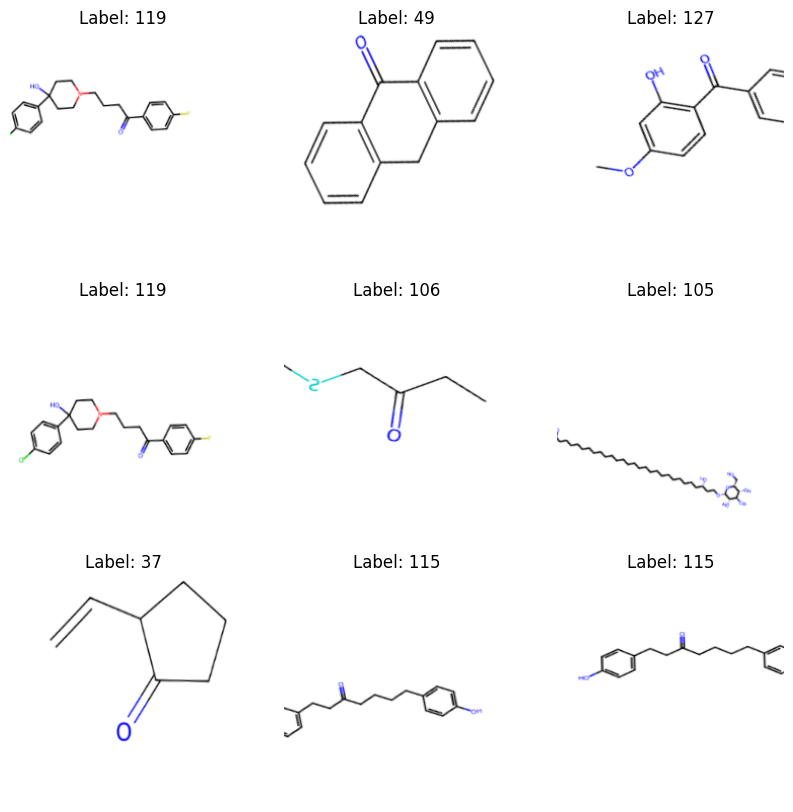

Epoch 1/25
4/4 [==============================] - 8s 2s/step - loss: 18.2613 - accuracy: 0.0000e+00 - val_loss: 5.1630 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/25
4/4 [==============================] - 6s 2s/step - loss: 5.0433 - accuracy: 0.0000e+00 - val_loss: 5.1118 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/25
4/4 [==============================] - 7s 2s/step - loss: 5.1222 - accuracy: 0.0081 - val_loss: 5.0693 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/25
4/4 [==============================] - 8s 2s/step - loss: 5.0487 - accuracy: 0.0000e+00 - val_loss: 5.0483 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/25
4/4 [==============================] - 7s 2s/step - loss: 5.0880 - accuracy: 0.0161 - val_loss: 5.1083 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/25
4/4 [==============================] - 7s 1s/step - loss: 5.0758 - accuracy: 0.0242 - val_loss: 5.0943 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/25
4/4 [==============================] - 7s 2s/step - 

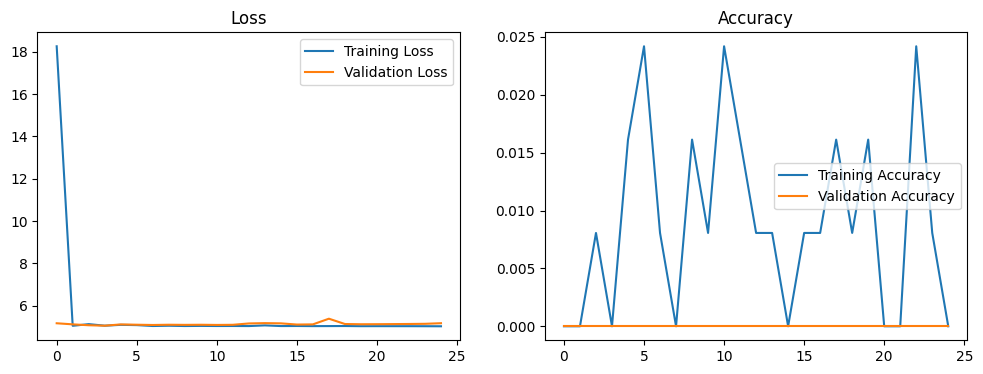

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Data Preparation
data_dir = '/content/gdrive/MyDrive/compounds_final'
image_files = os.listdir(data_dir)
X = []  # List to store images
y = []  # List to store labels

for file in image_files:
    # Load and preprocess images
    image = cv2.imread(os.path.join(data_dir, file))
    image = cv2.resize(image, (224, 224))  # Adjust size as needed
    image = image / 255.0  # Normalize pixel values

    # Add a white background to the image
    image_with_white_background = add_white_background(image)

    X.append(image_with_white_background)

    # Extract labels from file names
    label = file.split("_")[0]  # Assuming labels are before the first underscore
    y.append(label)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot the first 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = datagen.flow(X_train, y_train_encoded, batch_size=32).next()
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

# Rest of the code as before

datagen.fit(X_train)

# Model Architecture (a more complex CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training with learning rate scheduling
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    """Learning Rate Schedule"""
    lr = 1e-3
    if epoch > 75:
        lr *= 0.5
    if epoch > 100:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Training
batch_size = 32
epochs = 25

history = model.fit(datagen.flow(X_train, y_train_encoded, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test_encoded),
                    callbacks=[lr_scheduler])

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()



# Each image to be in a special foldr.
Create a base directory where the subfolders will be created.
Iterate through the image files, extract the image name, and create a subfolder with the same name.
Move each image to its respective subfolder.

In [7]:
import os
import shutil

# Path to the directory containing your images
image_dir = '/content/compounds1'

# Base directory where subfolders will be created
base_directory = '/content/organized_images'

# Create the base directory if it doesn't exist
if not os.path.exists(base_directory):
    os.makedirs(base_directory)

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

# Iterate through image files and organize them
for image_file in image_files:
    # Extract the image name (excluding the file extension)
    image_name = os.path.splitext(image_file)[0]

    # Create a subfolder with the same name if it doesn't exist
    subfolder_path = os.path.join(base_directory, image_name)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    # Move the image to the subfolder
    source_path = os.path.join(image_dir, image_file)
    destination_path = os.path.join(subfolder_path, image_file)

    shutil.move(source_path, destination_path)

print("Images organized into subfolders based on their names.")


Images organized into subfolders based on their names.


In [12]:
import os
import shutil

# Path to the directory containing your images
base_directory = '/content/organized_images'

# List all subdirectories in the base directory
subdirectories = [d for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# Iterate through subdirectories (image names)
for subdirectory in subdirectories:
    # Path to the subdirectory
    subdirectory_path = os.path.join(base_directory, subdirectory)

    # List all image files in the subdirectory
    image_files = [f for f in os.listdir(subdirectory_path) if f.endswith('.png')]

    # Duplicate each image 10 times
    for image_file in image_files:
        # Extract the image name (excluding the file extension)
        image_name, file_extension = os.path.splitext(image_file)

        # Duplicate the image 10 times
        for i in range(10):
            # Construct the new filename with an index
            new_image_name = f"{image_name}_{i + 1}{file_extension}"
            new_image_path = os.path.join(subdirectory_path, new_image_name)

            # Copy the image to the new filename
            source_path = os.path.join(subdirectory_path, image_file)
            shutil.copy(source_path, new_image_path)

print("Images duplicated 10 times and saved within their respective subfolders.")


Images duplicated 10 times and saved within their respective subfolders.


Number of classes: 94


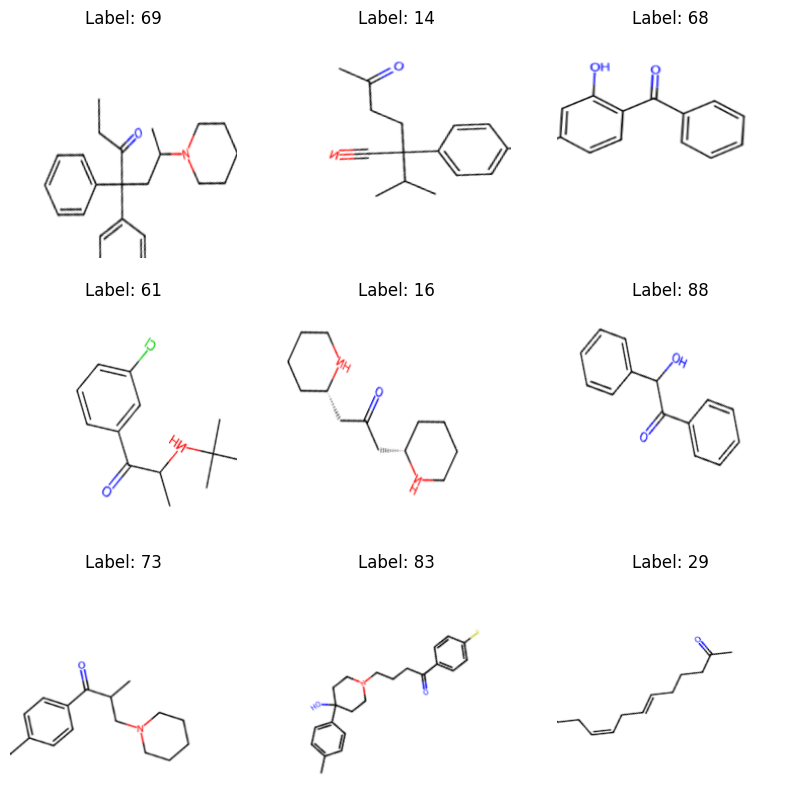

In [16]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Base directory containing subfolders of images
base_directory = '/content/organized_images'

# List all subdirectories (folders) within the base directory
subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

X = []  # List to store images
y = []  # List to store labels

# Iterate through subdirectories (folders)
for subdir in subdirectories:
    subdirectory_path = os.path.join(base_directory, subdir)
    image_files = os.listdir(subdirectory_path)

    for file in image_files:
        # Load and preprocess images
        image = cv2.imread(os.path.join(subdirectory_path, file))
        image = cv2.resize(image, (224, 224))  # Adjust size as needed
        image = image / 255.0  # Normalize pixel values

        # Add a white background to the image
        image_with_white_background = add_white_background(image)

        X.append(image_with_white_background)

        # Extract labels from subfolder names
        y.append(subdir)

X = np.array(X)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Data Splitting
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot the first 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = datagen.flow(X_train, y_train_encoded, batch_size=32).next()
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

# Rest of the code as before
# ...


<Figure size 1000x1000 with 0 Axes>

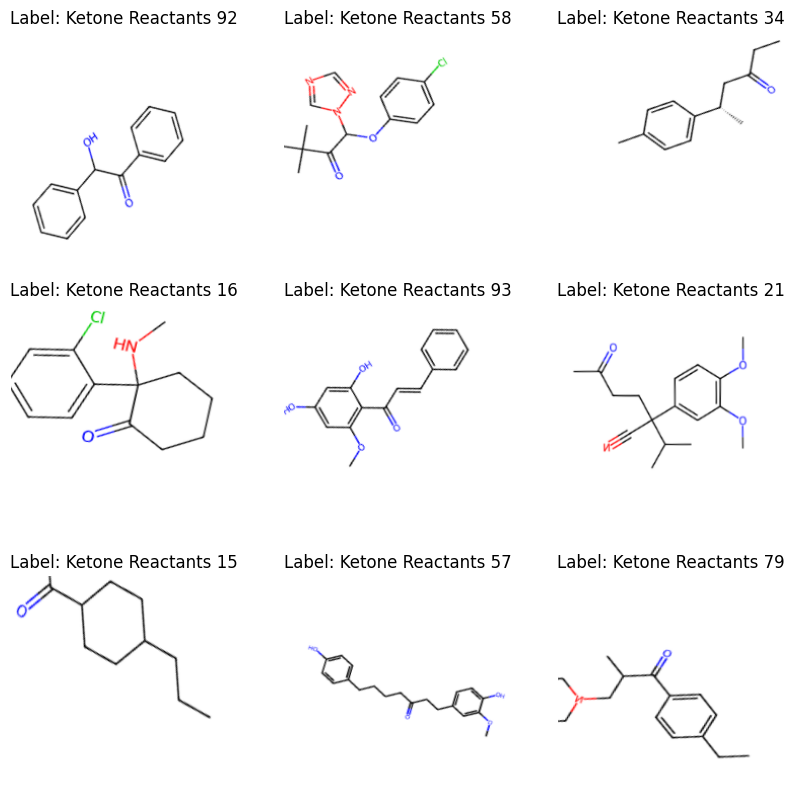

In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Function to add a white background to an image
def add_white_background(image):
    white_background = np.ones_like(image) * 255  # Create a white image
    white_background[:image.shape[0], :image.shape[1], :] = image  # Paste the original image
    return white_background

# Base directory containing subfolders of images
base_directory = '/content/organized_images'

X = []  # List to store images
y = []  # List to store labels (subfolder names)

# List all subdirectories (folders) within the base directory
subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

# Iterate through subdirectories (folders)
for subdir in subdirectories:
    subdirectory_path = os.path.join(base_directory, subdir)
    image_files = os.listdir(subdirectory_path)

    for file in image_files:
        # Load and preprocess images
        image = cv2.imread(os.path.join(subdirectory_path, file))
        image = cv2.resize(image, (224, 224))  # Adjust size as needed

        # Add a white background to the image
        image_with_white_background = add_white_background(image)

        X.append(image_with_white_background)

        # Use the subfolder name as the label
        y.append(subdir)

        # Load and preprocess images


X = np.array(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot the first 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = datagen.flow(X_train, y_train, batch_size=32).next()
    image = batch[0][0]

    # Clip pixel values to the valid range [0..255]
    image = np.clip(image, 0, 255).astype(np.uint8)

    label = batch[1][0]
    plt.imshow(image)
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()


# Continue with the model architecture, training, and evaluation


In [29]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dty

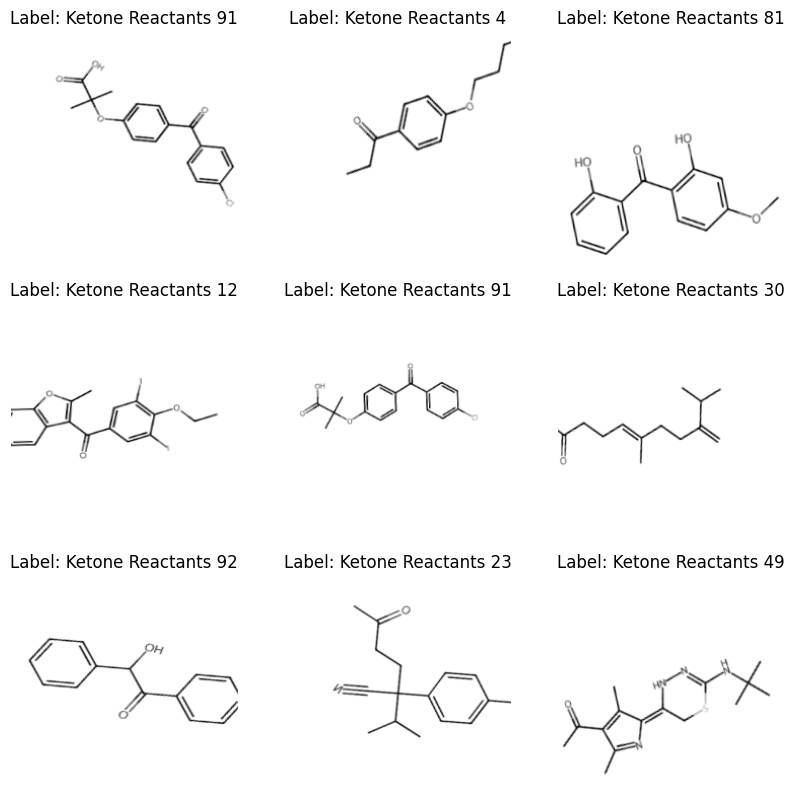

Epoch 1/25


UnimplementedError: ignored

In [30]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Base directory containing subfolders of grayscale images
base_directory = '/content/organized_images'

X = []  # List to store images
y = []  # List to store labels (subfolder names)

# List all subdirectories (folders) within the base directory
subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

# Iterate through subdirectories (folders)
for subdir in subdirectories:
    subdirectory_path = os.path.join(base_directory, subdir)
    image_files = os.listdir(subdirectory_path)

    for file in image_files:
        # Load grayscale images
        image = cv2.imread(os.path.join(subdirectory_path, file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (224, 224))  # Adjust size as needed
        image = np.expand_dims(image, axis=-1)  # Add a single channel for grayscale

        X.append(image)
        y.append(subdir)

X = np.array(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Plot augmented grayscale images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot the first 9 augmented images
    plt.subplot(3, 3, i + 1)
    batch = datagen.flow(X_train, y_train, batch_size=32).next()
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image[:, :, 0], cmap='gray')  # Set the colormap to grayscale
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

# Define and compile the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
batch_size = 32
epochs = 25

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/25
26/26 [==============================] - 68s 3s/step - loss: 27.3273 - accuracy: 0.0085 - val_loss: 4.4796 - val_accuracy: 0.0097
Epoch 2/25
26/26 [==============================] - 73s 3s/step - loss: 4.1263 - accuracy: 0.0919 - val_loss: 2.9241 - val_accuracy: 0.4783
Epoch 3/25
26/26 [==============================] - 75s 3s/step - loss: 1.9340 - accuracy: 0.5369 - val_loss: 0.4542 - val_accuracy: 0.9034
Epoch 4/25
26/26 [==============================] - 82s 3s/step - loss: 0.7532 - accuracy: 0.7908 - val_loss: 0.1629 - val_accuracy: 0.9758
Epoch 5/25
26/26 [==============================] - 69s 3s/step - loss: 0.4508 - accuracy: 0.8755 - val_loss: 0.0636 - val_accuracy: 0.9758
Epoch 6/25
26/26 [==============================] - 69s 3s/step - loss: 0.2728 - accuracy: 0.9262 - val_loss: 0.0276 - val_accuracy: 0.9758
Epoch 7/25
26/26 [==============================] - 68s 3s/step - loss: 0.2536 - accuracy: 0.9202 - val_loss: 0.0147 - val_accuracy: 0.9952
Epoch 8/25
26/26 [=

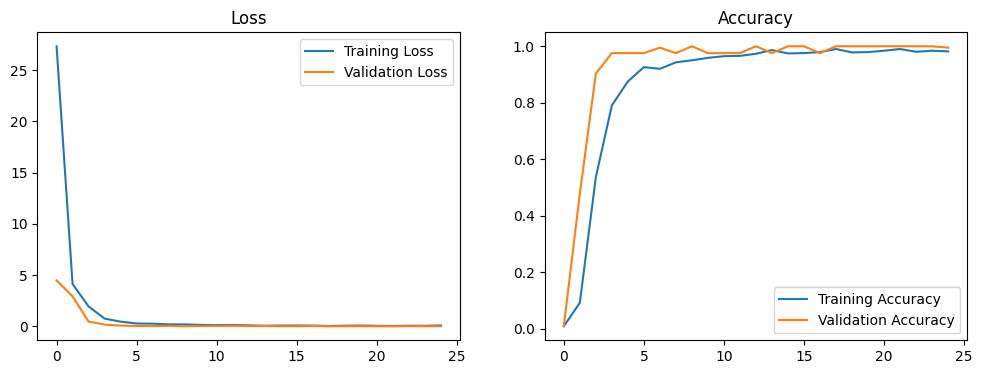

In [35]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Base directory containing subfolders of images
base_directory = '/content/organized_images'

X = []  # List to store images
y = []  # List to store labels (subfolder names)

# List all subdirectories (folders) within the base directory
subdirectories = [subdir for subdir in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, subdir))]

# Iterate through subdirectories (folders)
for subdir in subdirectories:
    subdirectory_path = os.path.join(base_directory, subdir)
    image_files = os.listdir(subdirectory_path)

    for file in image_files:
        # Load and preprocess images without changing the color
        image = cv2.imread(os.path.join(subdirectory_path, file))
        image = cv2.resize(image, (224, 224))  # Adjust size as needed

        X.append(image)
        y.append(subdir)

X = np.array(X)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
batch_size = 32
epochs = 25
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# ...

# Now, use y_train_encoded and y_test_encoded when fitting and evaluating the model
history = model.fit(X_train, y_train_encoded, epochs=epochs, validation_data=(X_test, y_test_encoded))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [45]:
!pip install scikit-learn

In [52]:
from sklearn.metrics import f1_score

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the F1-score
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Weighted F1 Score: {f1}')


7/7 [==============================] - 5s 629ms/step
Weighted F1 Score: 0.9929732103645148


In [56]:
# Calculate unique class names from y_train_encoded and y_test_encoded
class_names_train = np.unique(y_train_encoded)
class_names_test = np.unique(y_test_encoded)

# Combine the unique class names from both sets
class_names = np.unique(np.concatenate((class_names_train, class_names_test), axis=0))

7/7 [==============================] - 6s 768ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 1.00
Weighted F1 Score: 0.99
Weighted Precision: 0.99
Weighted Recall: 1.00


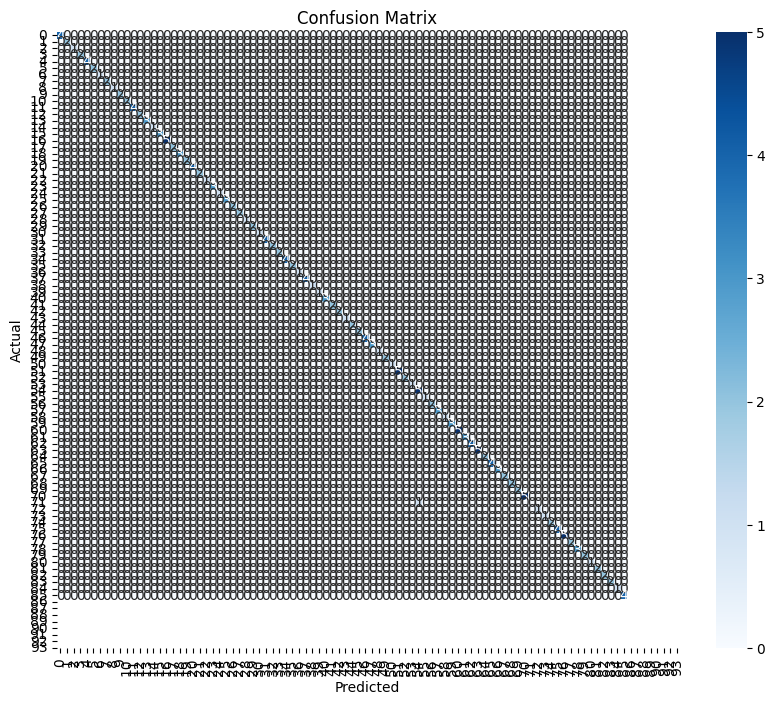

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Define class names by extracting unique labels from y_train_encoded or y_test_encoded

# # Calculate and display a classification report
# report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
# print("Classification Report:\n", report)

# Calculate and display a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Calculate accuracy, F1-score, precision, and recall
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1 Score: {f1:.2f}')
print(f'Weighted Precision: {precision:.2f}')
print(f'Weighted Recall: {recall:.2f}')
# Define class names by extracting unique labels from y_train_encoded or y_test_encoded

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 8s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 1.00
Weighted F1 Score: 0.99
Weighted Precision: 0.99
Weighted Recall: 1.00


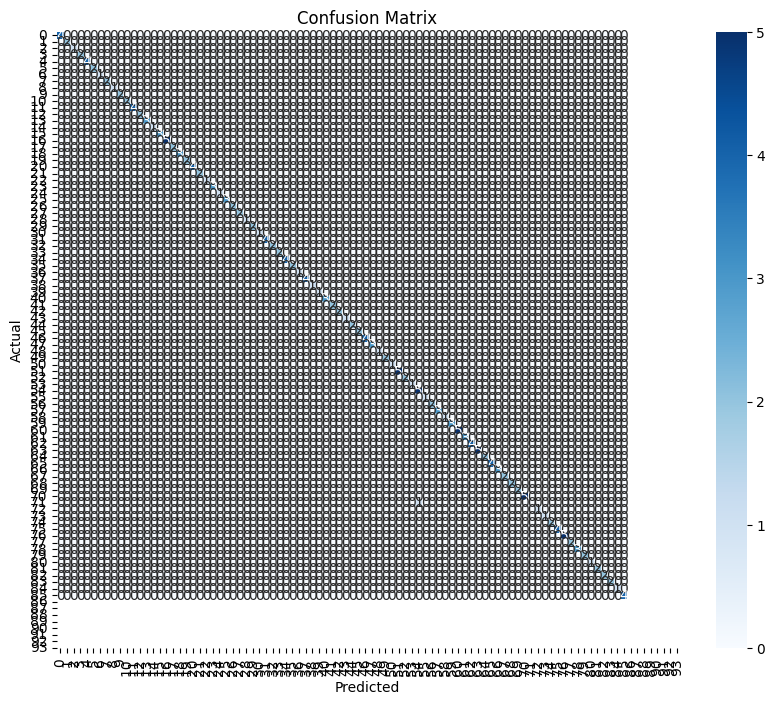

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and display a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Calculate accuracy, F1-score, precision, and recall
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1 Score: {f1:.2f}')
print(f'Weighted Precision: {precision:.2f}')
print(f'Weighted Recall: {recall:.2f}')

# Define class names by extracting unique labels from y_train_encoded or y_test_encoded
class_names = np.unique(np.concatenate((y_train_encoded, y_test_encoded), axis=0))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 7s 1s/step


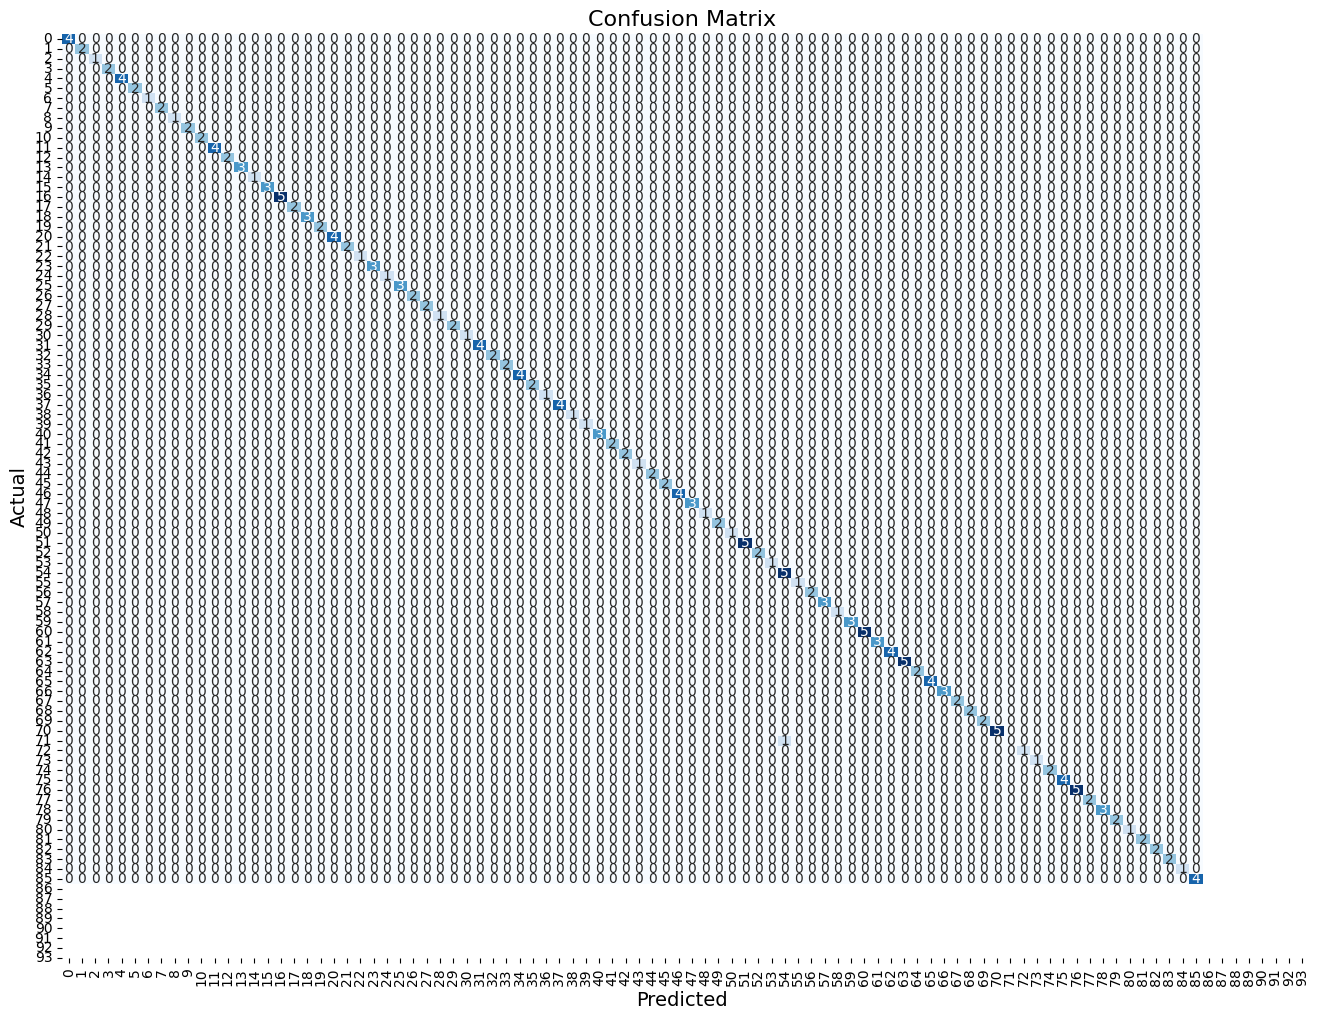

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and display a confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Define class names by extracting unique labels from y_train_encoded or y_test_encoded
class_names = np.unique(np.concatenate((y_train_encoded, y_test_encoded), axis=0))

# Create a larger heatmap
plt.figure(figsize=(16, 12))

# Plot the confusion matrix with larger fonts
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)

# Adjust the font size for better readability
sns.set(font_scale=1.2)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


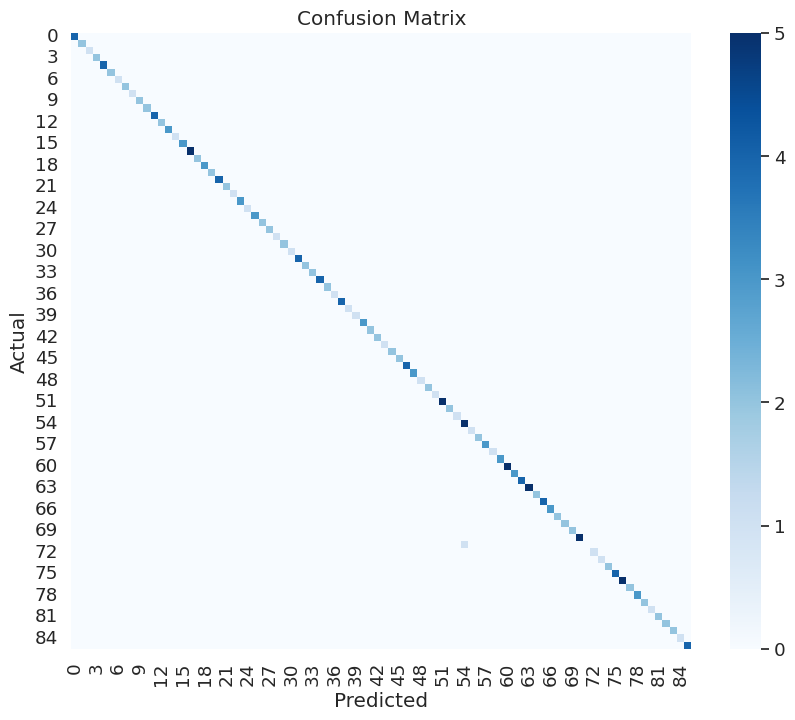

In [62]:
# ... (previous code)

# Plot the confusion matrix without labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


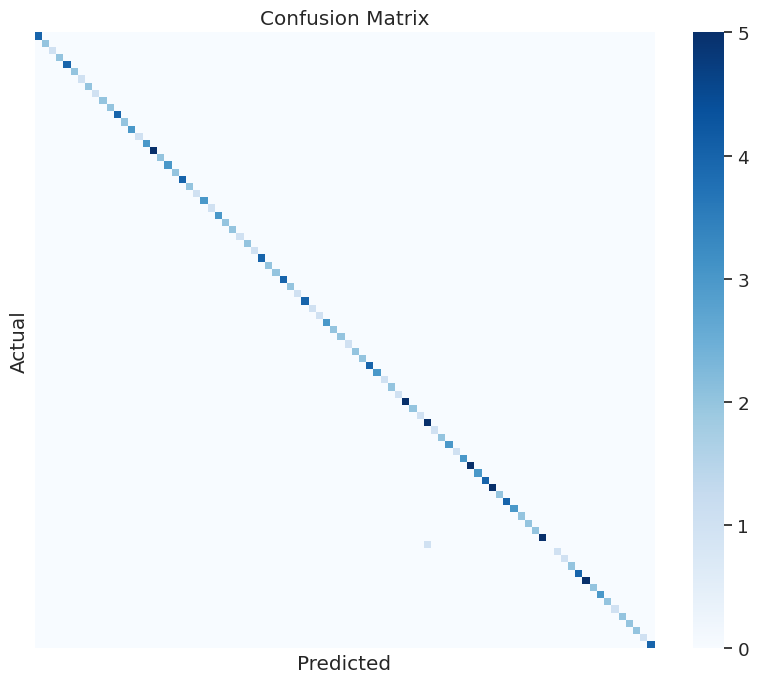

In [64]:
# ... (previous code)

# Plot the confusion matrix without labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, xticklabels=False, yticklabels=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
